<a href="https://colab.research.google.com/github/Mann2406/S4DS-repo/blob/task/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
company=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1000_Companies.csv')
X=company.iloc[:,:-1].values
y=company.iloc[:,4].values

In [ ]:
company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<ipython-input-15-32579ace6a33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(company.corr())


<Axes: >

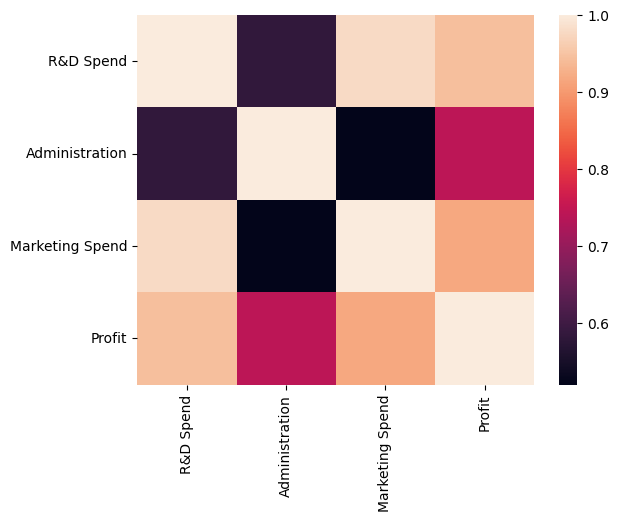

In [ ]:
sns.heatmap(company.corr())

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])

#onehotencoder = OneHotEncoder(categorical_features = [3])

ct=ColumnTransformer([("State", OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)
X = X[:,3:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89277.93054003,  87914.47646729,  94381.65899976, 176043.03107892,
        83597.58708608, 110755.97826629, 132203.39808538,  90960.58209961,
       164777.58862235,  53593.01784897,  66439.00295311, 150930.24999022,
       126400.09021075,  58827.17115615, 176995.47531643,  75502.66876761,
       118614.07271066, 164056.81999329, 171382.58712591, 182248.50594104,
       119169.40047641,  85157.5364504 , 181354.4095907 ,  83632.76748754,
       104492.155517  , 100720.13283149,  54102.82823857,  57069.0105291 ,
        68385.07833508, 209487.80143381, 121144.48546932, 111210.74895612,
       101672.57715358, 138323.66305576,  63458.96777026, 108343.97745534,
       186193.85616801, 171805.08295377, 175006.49706597, 118037.4577271 ,
        96916.36211187, 164934.61324361, 107210.48293426,  50564.93145379,
       116879.93764961,  58121.84755216, 158779.76381228,  78910.0167059 ,
       160090.87630219, 131502.96069503, 185242.27000119, 174971.3167491 ,
        93232.71947067,  

In [ ]:
regressor.coef_

array([0.52737847, 0.8458277 , 0.10664082])

In [ ]:
regressor.intercept_

-51639.78825350042

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.91173752949641

# Logistic Regression

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [ ]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


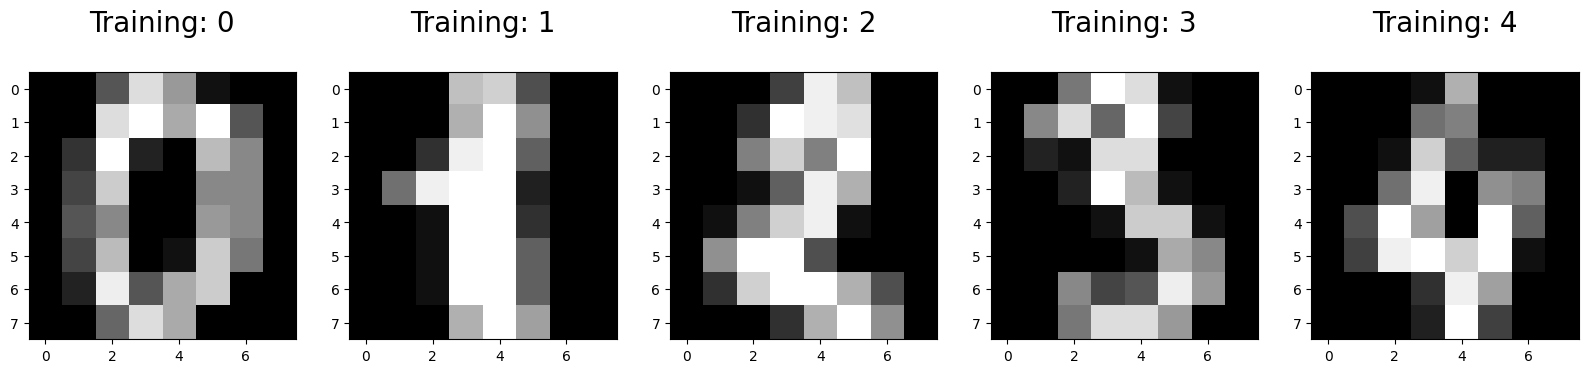

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state = 2)

In [ ]:
print(x_train.shape)

(1383, 64)


In [ ]:
print(y_train.shape)

(1383,)


In [ ]:
print(x_test.shape)

(414, 64)


In [ ]:
print(y_test.shape)

(414,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticregression=LogisticRegression()
logisticregression.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(logisticregression.predict(x_test[0].reshape(1,-1)))

[4]


In [ ]:
logisticregression.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [ ]:
predictions = logisticregression.predict(x_test)

In [ ]:
score = logisticregression.score(x_test, y_test)

In [ ]:
print(score)

0.9516908212560387


In [ ]:
from matplotlib import cm
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted lable');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

ValueError: ignored

<Figure size 900x900 with 0 Axes>